# **Python Setup**
## Start by running the next cell

In [2]:
#@title # Python Setup { display-mode: "form" }

#@markdown <font color="red"> ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ </font>

#@markdown <font color="red"><h3><b><i> Begin by running this cell.</i></b></h3> </font>

#@markdown <font color="red"> ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ </font>
!pip install exifread &> /dev/null

import os, sys
if 'google.colab' in str(get_ipython()):
  print('Google Colab Environment - Loading Dependencies...')
  !rm -r ImageSTEM imageSTEAM &> /dev/null
  !git clone https://github.com/ImagingLyceum-ASU/ImageSTEAM.git &> /dev/null
  !mv ImageSTEAM/imageSTEAM ./
  !rm -r ImageSTEAM
else:
  print('Local iPython Environment')
  dir1 = os.path.dirname(os.path.abspath('../../'))
  if not dir1 in sys.path: sys.path.append(dir1)

import imageSTEAM as steam
from imageSTEAM import *

print('Environment Ready!')

Google Colab Environment - Loading Dependencies...
Environment Ready!


# **Introduction**

- How can we use color to help computers manipulate images?
- visual effects

#  
<font color="red"> %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
</font>


# **HSV Space**

Let's teach about Hue, Saturation and Value.

In [2]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout
from matplotlib.colors import hsv_to_rgb, rgb_to_hsv
import skimage

def pixelHSVExample():
  pixel = np.zeros((1,1,3), dtype='float32')

  pixel = rgb_to_hsv(pixel)

  sliderH = widgets.FloatSlider(description='Hue', value=0.5, min=0, max=1)
  sliderS = widgets.FloatSlider(description='Saturation', value=0.5, min=0, max=1)
  sliderV = widgets.FloatSlider(description='Value', value=0.5, min=0, max=1)
  sliders = VBox([sliderH, sliderS, sliderV])

  def _update_display(h, s, v):
    tmp_img = pixel.copy()
    for c in range(pixel.shape[2]):
      tmp_img[..., c] = pixel[..., c] + [h, s, v][c]

    plt.imshow(hsv_to_rgb(tmp_img), cmap='gray')
    plt.show()

  output = widgets.interactive_output(_update_display,
                                      {'h': sliderH, 's': sliderS, 'v': sliderV})
  final_widget = VBox([output, sliders])
  display(final_widget)

pixelHSVExample()


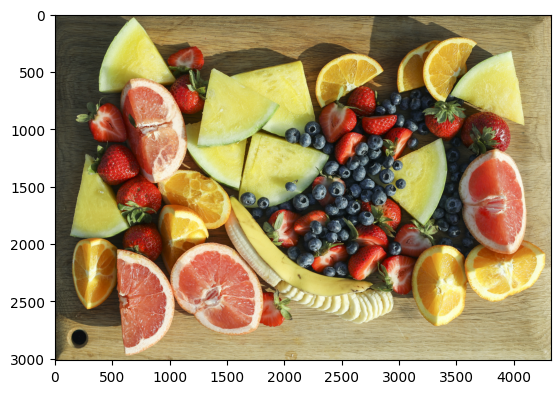

In [100]:
#@markdown Lets try applying this to a sample example image
#@markdown Use the slider to understand what changing each of the hue, saturation and values affect
pixel = cv2.imread('./imageSTEAM/data/fruits.jpg')
pixeldisp = cv2.cvtColor(pixel, cv2.COLOR_BGR2RGB)
display_img(pixeldisp)
pixelHSVExample_(pixel)

Saving dog.jpg to dog.jpg


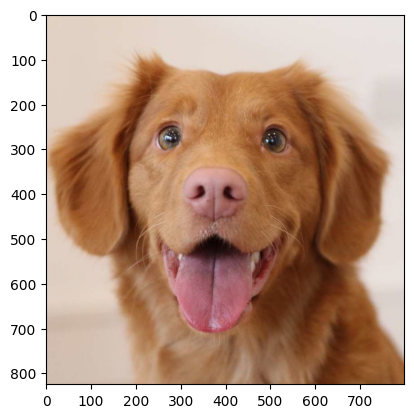

In [101]:
#@markdown Now try this on an image of your choice

#@markdown *Begin by uploading an image(.png, .jpg, etc)*
uploaded = files.upload()           # Use colab upload dialog.
uploaded = list(uploaded.keys())    # Get uploaded filenames.
assert len(uploaded) == 1           # Make sure only uploaded one file.
os.rename(uploaded[0], 'input.jpg') # Rename file to "input.mp4".
pixel = cv2.imread('input.jpg')
pixeldisp = cv2.cvtColor(pixel, cv2.COLOR_BGR2RGB)
display_img(pixeldisp)
pixelHSVExample_(pixel)

Now, let's see if we can identify all objects based on one color. This is known as segmentation.

In [3]:
#Have students pick a color in HSV space. Then have it segment all pixels with that color.
def HSVSegmentation(img=steam.data.fruits()):
  img = img.astype('float32') / 255.0
  img_segm = np.zeros_like(img, dtype='float32')
  img_hsv = rgb_to_hsv(img)
  # print(img_hsv)

  segmented_out = widgets.Output()

  sliderH = widgets.FloatSlider(description='Hue', value=0, min=0, max=1, step=0.05)
  sliderS = widgets.FloatSlider(description='Saturation', value=0, min=0, max=1, step=0.05)
  sliderV = widgets.FloatSlider(description='Value', value=0, min=0, max=1, step=0.05)
  sliders = VBox([sliderH, sliderS, sliderV])

  def _update_display(h, s, v, img_segm=img_segm):
    tmp_img = img_hsv.copy()
    # for c in range(img.shape[2]):
    #   tmp_img[..., c] = img[..., c] + [h, s, v][c]

    plt.imshow(hsv_to_rgb(tmp_img), cmap='gray')
    plt.show()

    mask = (tmp_img[..., 0] > h-0.05) & (tmp_img[..., 0] < h+0.05) & (tmp_img[..., 1] > s-0.05) & (tmp_img[..., 1] < s+0.05) & (tmp_img[..., 2] > v-0.05) & (tmp_img[..., 2] < v+0.05)
    for c in range(img.shape[2]):
      img_segm[..., c] = img[..., c] * mask

    with segmented_out:
      plt.imshow(img_segm, cmap='gray')
      plt.show()
      segmented_out.clear_output(wait=True)

    img_segm = img

  output = widgets.interactive_output(_update_display,
                                      {'h': sliderH, 's': sliderS, 'v': sliderV})
  final_widget = VBox([output, sliders, segmented_out])
  display(final_widget)
image = steam.data.fruits()
h, w = image.shape[:2]
image = cv2.resize(image, (w//20,h//20))
print(image.shape)
HSVSegmentation(image)

(150, 216, 3)


One HSV value is pretty difficult, so maybe we should allow a range of them.

In [4]:
#TODO: Now do a range of HSV values (maybe with sliders? or inputting numbers), so they can segment a range of values
#Have students pick a color in HSV space. Then have it segment all pixels with that color.
def HSVSegmentation(img=steam.data.fruits()):
  img = img.astype('float32') / 255.0
  img_segm = np.zeros_like(img, dtype='float32')
  img_hsv = rgb_to_hsv(img)

  segmented_out = widgets.Output()

  sliderH = widgets.FloatRangeSlider(description='Hue', value=[0, 1.0], min=0, max=1, step=0.01)
  sliderS = widgets.FloatRangeSlider(description='Saturation', value=[0, 1.0], min=0, max=1, step=0.01)
  sliderV = widgets.FloatRangeSlider(description='Value', value=[0, 1.0], min=0, max=1, step=0.01)
  sliders = VBox([sliderH, sliderS, sliderV])

  def _update_display(h, s, v, img_segm=img_segm):
    tmp_img = img_hsv.copy()
    # for c in range(img.shape[2]):
    #   tmp_img[..., c] = img[..., c] + [h, s, v][c]

    # plt.imshow(hsv_to_rgb(tmp_img), cmap='gray')
    # plt.show()

    mask = (tmp_img[..., 0] >= h[0]) & (tmp_img[..., 0] <= h[1]) & (tmp_img[..., 1] >= s[0]) & (tmp_img[..., 1] <= s[1]) & (tmp_img[..., 2] >= v[0]) & (tmp_img[..., 2] <= v[1])
    for c in range(img.shape[2]):
      img_segm[..., c] = img[..., c] * mask

    with segmented_out:
      plt.imshow(img_segm, cmap='gray')
      plt.show()
      segmented_out.clear_output(wait=True)

    img_segm = img

  output = widgets.interactive_output(_update_display,
                                      {'h': sliderH, 's': sliderS, 'v': sliderV})
  with output:
    plt.imshow(img); plt.show()

  final_widget = VBox([output, sliders, segmented_out])
  display(final_widget)

image = steam.data.fruits()
h, w = image.shape[:2]
image = cv2.resize(image, (w//20,h//20))
print(image.shape)
HSVSegmentation(image)

(150, 216, 3)


Saving dreamscapePixlr.png to dreamscapePixlr (1).png
User uploaded file "dreamscapePixlr (1).png" with length 1931310 bytes


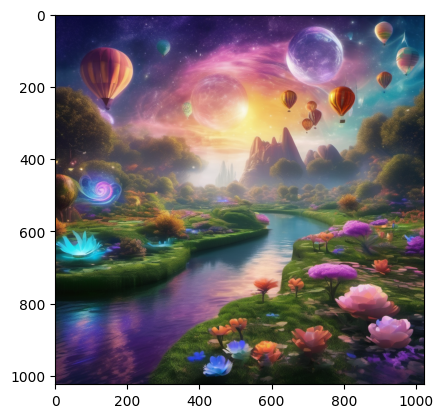

In [103]:
#@markdown Let us try segmenting an image of your choice

#@markdown *Begin by uploading an image (.png, .jpg, etc)*
image = upload_image()
HSVSegmentationrange(image)

# **Activity: Green Screening**

Upload two images, one with a green/blue screen, and one with the target image you want to replace the green screen with.

In [99]:
#TODO
# have students upload a source and target/background image.
# Then have them select the correct HSV value to composite. Then composite the target image into the source image for those pixels
# it won't be perfect, but will give them the idea of how it works

from matplotlib.colors import rgb_to_hsv, hsv_to_rgb
def greenScreen(img_green, img_background):
  green = img_green.astype('float32') / 255.0
  background = img_background.astype('float32') / 255.0
  img_segm = np.zeros_like(green, dtype='float32')
  img_hsv = rgb_to_hsv(green)

  segmented_out = widgets.Output()

  sliderH = widgets.FloatRangeSlider(description='Hue', value=[0, 1.0], min=0, max=1, step=0.01)
  sliderS = widgets.FloatRangeSlider(description='Saturation', value=[0, 1.0], min=0, max=1, step=0.01)
  sliderV = widgets.FloatRangeSlider(description='Value', value=[0, 1.0], min=0, max=1, step=0.01)
  sliders = VBox([sliderH, sliderS, sliderV])

  def _update_display(h, s, v, img_segm=img_segm):
    tmp_img = img_hsv.copy()
    # for c in range(img.shape[2]):
    #   tmp_img[..., c] = img[..., c] + [h, s, v][c]

    # plt.imshow(hsv_to_rgb(tmp_img), cmap='gray')
    # plt.show()

    mask = (tmp_img[..., 0] >= h[0]) & (tmp_img[..., 0] <= h[1]) & (tmp_img[..., 1] >= s[0]) & (tmp_img[..., 1] <= s[1]) & (tmp_img[..., 2] >= v[0]) & (tmp_img[..., 2] <= v[1])
    print(tmp_img.shape)
    print(mask.shape)
    print(background.shape)
    for c in range(tmp_img.shape[2]):
      img_segm[..., c] = green[..., c] * (1-mask) + background[..., c] * mask

    with segmented_out:
      plt.figure(dpi=100)
      plt.imshow(img_segm, cmap='gray')
      plt.show()
      segmented_out.clear_output(wait=True)

    # img_segm = img

  output = widgets.interactive_output(_update_display,
                                      {'h': sliderH, 's': sliderS, 'v': sliderV})
  with output:
    plt.figure(dpi=100)
    plt.subplot(1,2,1)
    plt.imshow(green)
    plt.subplot(1,2,2)
    plt.imshow(background); plt.show()

  final_widget = VBox([output, sliders, segmented_out])
  display(final_widget)

green = read_image('/content/imageSTEAM/data/greenscreen.jpg')
background = read_image('/content/imageSTEAM/data/greenscreen_bg.jpg')
background = background[:, :1999, :]
h1,w1 = green.shape[:2]
h2,w2 = background.shape[:2]

# padding = ((top, bot), (left,right))
padding = ((h2-h1, 0), ((w2-w1)//2, (w2-w1)//2), (0,0))
green_pad = np.pad(green, pad_width=padding, mode='edge')

greenScreen(img_green=green_pad, img_background=background)